In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy import signal
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
%matplotlib inline

In [2]:
from sklearn import linear_model

In [3]:
df = pd.read_pickle('MaunaLoa.picke')

In [4]:
n = df.index.size
t = np.arange(n).reshape((n,1))
df['WeekIndex'] = t

In [5]:
OLSModel = linear_model.LinearRegression()
OLSFit = OLSModel.fit(t, df.Interpolated)

In [6]:
df['LinearFit'] = OLSFit.predict(t)

In [7]:
RANSACModel = linear_model.RANSACRegressor()
RANSACFit = RANSACModel.fit(t, df.Interpolated)

In [8]:
df['LinearFit'] = RANSACFit.predict(t)

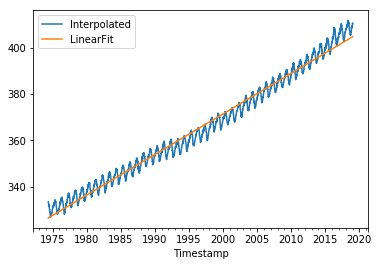

In [9]:
df[['Interpolated', 'LinearFit']].plot()

In [10]:
(RANSACFit.estimator_.coef_[0], RANSACFit.estimator_.intercept_)

(0.03360529298208463, 326.4338619898997)

In [11]:
df.sample(5)

,Original,Performance,Interpolated,WeekIndex,LinearFit
Timestamp,,,,,
2004-11-28,376.82,7,376.82,1593,379.967094
1987-03-29,351.10,5,351.10,671,348.983014
1993-05-02,359.47,7,359.47,989,359.669497
2006-11-26,381.24,6,381.24,1697,383.462044
2008-02-03,386.01,7,386.01,1759,385.545572


In [12]:
df['LinearDetrend'] = df['Interpolated'] - df['LinearFit']

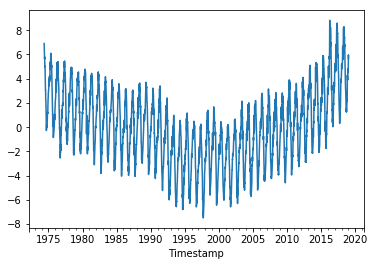

In [13]:
df['LinearDetrend'].plot()

In [14]:
df['LinearDetrend'].mean()

2.2117966926963908e-14

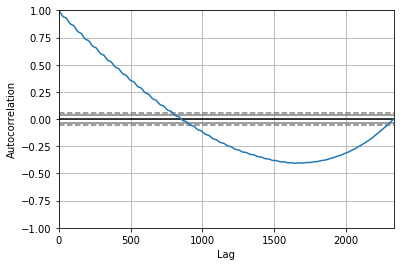

In [15]:
autocorrelation_plot(df.Interpolated)

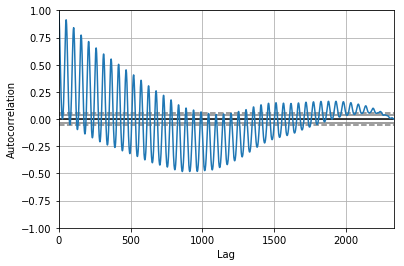

In [16]:
axe = autocorrelation_plot(df.LinearDetrend)
#axe.legend()

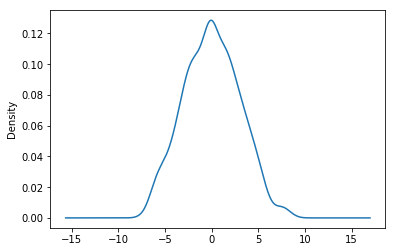

In [17]:
df.LinearDetrend.plot(kind='kde')

In [18]:
df.sample(5)

,Original,Performance,Interpolated,WeekIndex,LinearFit,LinearDetrend
Timestamp,,,,,,
1986-02-09,347.22,6,347.22,612,347.000301,0.219699
2014-06-15,401.03,7,401.03,2091,396.702530,4.327470
1996-04-21,364.55,7,364.55,1144,364.878317,-0.328317
1988-09-25,348.75,6,348.75,749,351.604226,-2.854226
2012-10-21,391.33,6,391.33,2005,393.812474,-2.482474


In [19]:
df['SGSeasonalTrend'] = signal.savgol_filter(df.Interpolated, 4*6+1, 2)
#df['SavGov1Y'] = signal.savgol_filter(df.Interpolated, 4*12+1, 2)
#df['SavGov5Y'] = signal.savgol_filter(df.Interpolated, 5*4*12+1, 2)
df['SGLongTermTrend'] = signal.savgol_filter(df.Interpolated, 10*4*12+1, 2)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


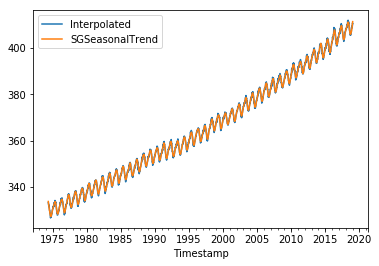

In [20]:
df[['Interpolated', 'SGSeasonalTrend']].plot()

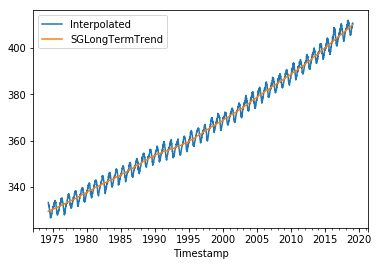

In [21]:
df[['Interpolated', 'SGLongTermTrend']].plot()

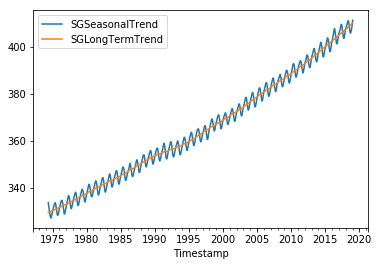

In [22]:
df[['SGSeasonalTrend', 'SGLongTermTrend']].plot()

In [23]:
df['SGSeasonalDetrend'] = df['Interpolated'] - df['SGSeasonalTrend']
df['SGLongTermDetrend'] = df['Interpolated'] - df['SGLongTermTrend']

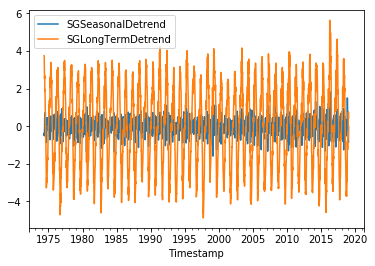

In [24]:
df[['SGSeasonalDetrend', 'SGLongTermDetrend']].plot()

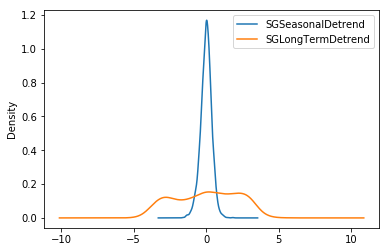

In [25]:
df[['SGSeasonalDetrend', 'SGLongTermDetrend']].plot(kind='kde')

In [26]:
df.to_pickle('MaunaLoa_Detrend.pickle')

In [34]:
df.to_pickle('JoinCO2.pickle')